### Nama : Muhammad Wahyu Fadli
### NIM : 09011381823086
### Kelas : SK Bukit

# UJIAN AKHIR SEMESTER KECERDASAN BUATAN TEORI

### Dataset Source : https://www.kaggle.com/heptapod/titanic

## Prediksi penumpang yang selamat atau tidak dari tenggelamnya kapal Titanic dengan menggunakan algoritma supervised KNN (K - Nearest Neightbor)

### Importing Libraries

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Library - library yang digunakan dalam case kali ini, yaitu sebagai berikut :

1. import pandas as pd ---> Pandas adalah sebuah library dari python libary yang memberikan kita untuk menampilkan sebuah data yang mana mendukung file data yang berformat csv, excel spreadsheet, dan sebagainya yang nantinya akan dijadikan objek python untuk ditampilkan dalam bentuk baris dan kolom yang disebut dengan dataframe.

2. from sklearn.model_selection import train_test_split ---> train_test_split adalah sebuah library dari sci-kit learn yang tipenya model selection untuk nantinya kita bisa memisahkan suatu data menjadi kelompok train data dan test data.

3. from sklearn.preprocessing import StandardScaler ---> StandardScaler adalah sebuah library dari sci-kit learn yang digunakan pada saat preprocessing yang bertujuan untuk standardisasi suatu data.

4. from sklearn.neighbors import KNeighborsClassifier ---> KNeighborsClassifier adalah sebuah fitur dari sci-kit yang memberikan kita untuk melakukan classifier dengan algoritma KNN (K - Nearest Neighbor).

5. from sklearn.metrics import confusion_matrix ---> confusion_matrix adalah fitur dari sci-kit yang memberikan kita untuk mengevaluasi sebuah data yang diklasifikasi.

6. import seaborn as sns ---> Seaborn adalah library dari python library yang memberikan kita untuk memvisualisasi suatu data dalam bentuk sebuah grafik, histogram, dan lainnya. Dibandingkan matplotlib, penggunaan seaborn terlihat lebih enak dari segi warna dan bentuk.

7. import matplotlib.pyplot as plt ---> Matplotlib adalah library dari python library yang fungsinya hampir sama dengan seaborn. Akan tetapi matplotlib bisa mengatur ukuran dari apa yang divisualisasikan.

8. %matplotlib inline

### Masukkan Dataset

In [2]:
titanic = pd.read_csv('titanic.csv')
titanic.head()

,Passengerid,Age,Fare,Sex,sibsp,zero,zero.1,zero.2,zero.3,zero.4,...,zero.12,zero.13,zero.14,Pclass,zero.15,zero.16,Embarked,zero.17,zero.18,2urvived
0,1,22.0,7.2500,0,1,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0
1,2,38.0,71.2833,1,1,0,0,0,0,0,...,0,0,0,1,0,0,0.0,0,0,1
2,3,26.0,7.9250,1,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,1
3,4,35.0,53.1000,1,1,0,0,0,0,0,...,0,0,0,1,0,0,2.0,0,0,1
4,5,35.0,8.0500,0,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0


Karena pada case kali ini kita akan mempredict selamat atau tidaknya penumpang pada kapal Titanic untuk itu kita masukkan terlebih dahulu dataset tersebut (titanic.csv) yang mana format file dataset tersebut adalah csv. Setelah kita memasukkan sebuah dataset maka kita bisa melihat isi data tersebut dengan menggunakan titanic.head() yang nantinya akan ditampilkan isi dataset tersebut pada bagian paling atas.

In [3]:
# Melihat tipe - tipe data dari dataset Titanic
titanic.dtypes

Passengerid      int64
Age            float64
Fare           float64
Sex              int64
sibsp            int64
zero             int64
zero.1           int64
zero.2           int64
zero.3           int64
zero.4           int64
zero.5           int64
zero.6           int64
Parch            int64
zero.7           int64
zero.8           int64
zero.9           int64
zero.10          int64
zero.11          int64
zero.12          int64
zero.13          int64
zero.14          int64
Pclass           int64
zero.15          int64
zero.16          int64
Embarked       float64
zero.17          int64
zero.18          int64
2urvived         int64
dtype: object

In [4]:
# Menghapus Kolom - kolom pada data set yang tidak perlu
titanic = titanic.drop(['sibsp', 'zero', 'zero.1', 'zero.2', 'zero.3', 'zero.4', 'zero.5', 'zero.6', 
                        'Parch', 'zero.7', 'zero.8', 'zero.9', 'zero.10', 'zero.11', 'zero.12', 'zero.13', 
                        'zero.14', 'Pclass', 'zero.15', 'zero.16', 'Embarked', 'zero.17', 'zero.18'], axis=1)
titanic.head(10)

,Passengerid,Age,Fare,Sex,2urvived
0,1,22.0,7.2500,0,0
1,2,38.0,71.2833,1,1
2,3,26.0,7.9250,1,1
3,4,35.0,53.1000,1,1
4,5,35.0,8.0500,0,0
5,6,28.0,8.4583,0,0
6,7,54.0,51.8625,0,0
7,8,2.0,21.0750,0,0
8,9,27.0,11.1333,1,1
9,10,14.0,30.0708,1,1


In [5]:
# Mengganti nama dari kolom tertentu
titanic = titanic.rename(columns={"2urvived":"Survived"})
titanic.head(10)

,Passengerid,Age,Fare,Sex,Survived
0,1,22.0,7.2500,0,0
1,2,38.0,71.2833,1,1
2,3,26.0,7.9250,1,1
3,4,35.0,53.1000,1,1
4,5,35.0,8.0500,0,0
5,6,28.0,8.4583,0,0
6,7,54.0,51.8625,0,0
7,8,2.0,21.0750,0,0
8,9,27.0,11.1333,1,1
9,10,14.0,30.0708,1,1


In [6]:
titanic.tail(10)

,Passengerid,Age,Fare,Sex,Survived
1299,1300,28.0,7.7208,1,0
1300,1301,3.0,13.7750,1,0
1301,1302,28.0,7.7500,1,0
1302,1303,37.0,90.0000,1,0
1303,1304,28.0,7.7750,1,0
1304,1305,28.0,8.0500,0,0
1305,1306,39.0,108.9000,1,0
1306,1307,38.5,7.2500,0,0
1307,1308,28.0,8.0500,0,0
1308,1309,28.0,22.3583,0,0


### Extracting indenpendent variables

In [7]:
x = titanic.iloc[:,0:4]

Indenpendent Variables --> Variable yang nilainya tidak dipengaruhi oleh variable lain.

### Ectracting dependent variable

In [8]:
y = titanic.iloc[:,4]

Dependent variable --> Variable yang nilainya dipengaruhi oleh variable lain.

### Exploring data to know relation before processing

<AxesSubplot:>

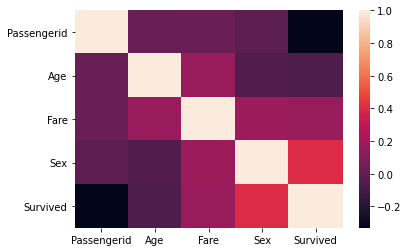

In [9]:
sns.heatmap(titanic.corr())

<AxesSubplot:xlabel='Sex', ylabel='count'>

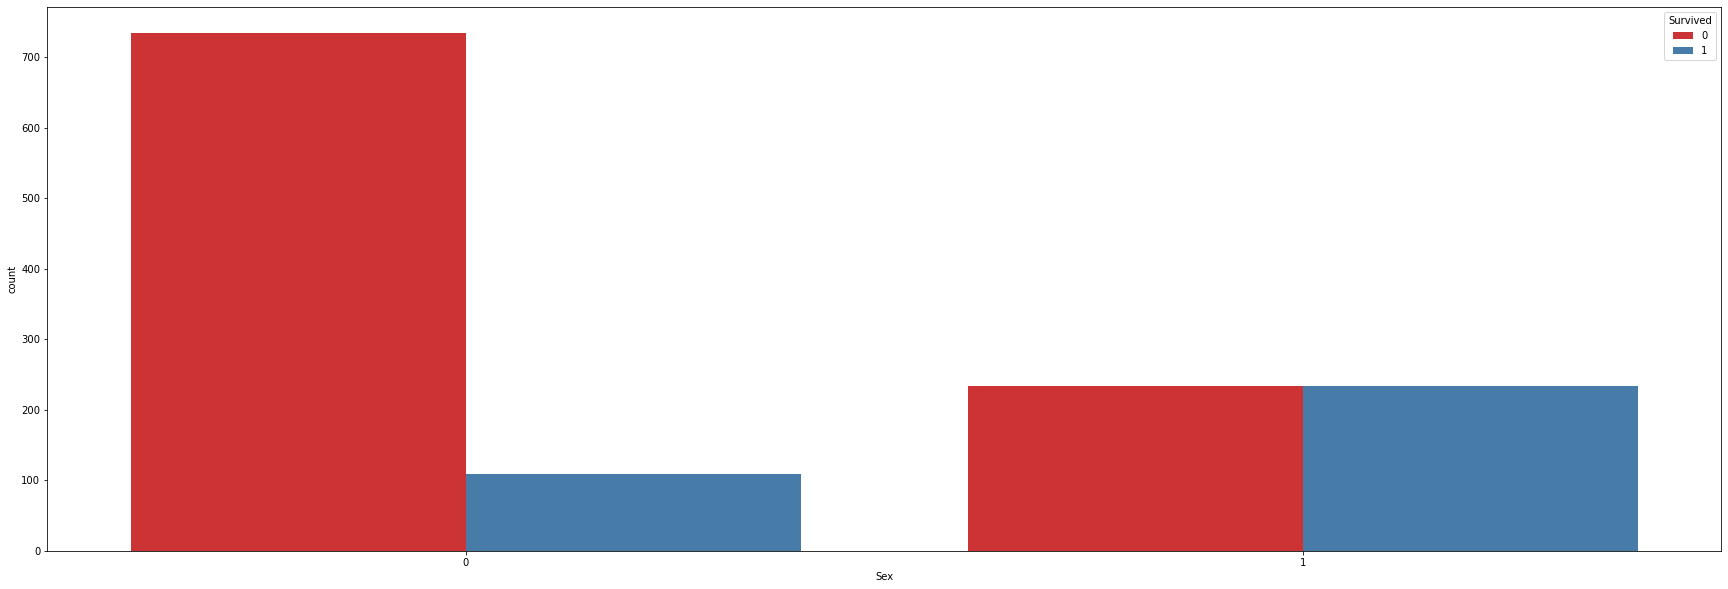

In [10]:
plt.figure(figsize=(30,10))
sns.countplot(x='Sex', hue='Survived', data=titanic, palette='Set1')

### Splitting dataset into training and testing set

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

### Feature Scaling

In [12]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

## KNN (K - Nearest Neighbor)

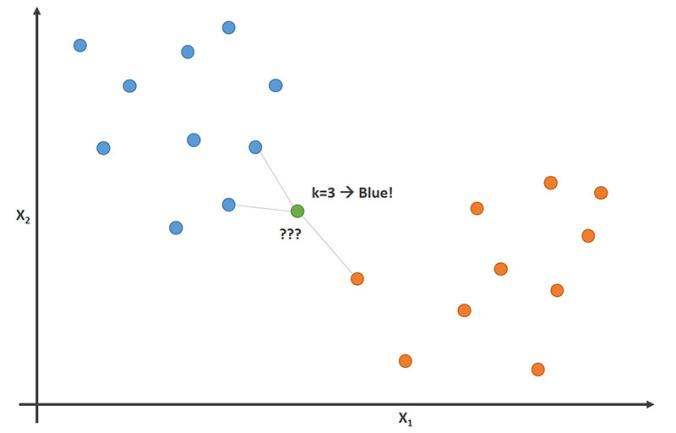

KNN adalah suatu algoritma supervised yang bekerja untuk mengklasifikasikan sebuah objek data ke kelas tertentu berdasarkan karakteristik yang dimiliki. Jadi, misalnya pada gambar diatas ada sebuah data latih yang tergolong baru dimasukkan ke dalam dimensi yang sangat tinggi, di dalam dimensi ini sendiri kita lihat bahwa data yang ingin di-classify terletak diantara jenis kelas data yang berbeda. Jadi, agar suatu kelas yang baru ini ter-classify maka kita perlu melihat  'k' buah tetangga dari data tersebut, lalu kita lihat kelas mayoritas disekitaran satu data tersebut. Jika sudah maka data yang satu ini akan menjadi kelas yang bersangkutan. Dalam melakukan predict dengan menggunakan algoritma KNN biasanya akan didapatkan sebuah akurasi yang tidak terlalu buruk tergolong dan penggunaannya yang simple.

### Loading Model - KNN

In [13]:
classifier = KNeighborsClassifier(n_neighbors=5,p=2, metric='euclidean')

Kita akan melakukan pemodelan classifier dimana digunakannya classifier dari KNN. Dalam hal ini akan ditentukan k buah tetangga yang terdekat dari satu data ingin di-classifier, yaitu sebanyak 5. Pada kode program dituliskan n_neighbors = 5.
Selanjutnya, digunakan kekuatan parameter yang mana p = 2, hal tersebut digunakan nilai 2 dikarenakan kita akan menggunakan tenknik pencarian tetangga dengan menggunakan euclidean. Dan terakhir ada metric yang maksudnya penjarakan dalam mencari tetangga. Telah disebutkan bahwa dalam teknik pencarian tetangga yang terdekat kita akan menggunakan "Euclidean", maka formula dari euclidean dapat diformulakan dibawah ini :

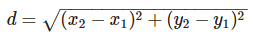

### Fitting Model

In [14]:
classifier.fit(x_train, y_train)

KNeighborsClassifier(metric='euclidean')

### Making Predictions

In [15]:
y_pred = classifier.predict(x_test)

### Evaluating Model With Using Confusion Matrix
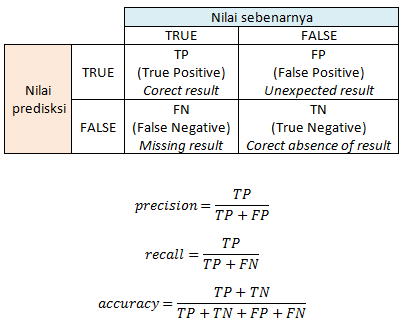




Confusion matrix atau biasa disebut dengan matriks kebingungan adalah pemodelan komputasi yang digunakan dalam hal pengevaluasian keakuratan dari sebuah klasifikasi. Confusion matrix terbentuk atas tabel baris dan kolom dan juga memiliki yang namanya nilai prediksi (Predicted Values) dan nilai sebenarnya (Actual Values)

In [16]:
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

[[154  23]
 [ 31  54]]


### Confusion Matrix

Setelah menggunakan confusion matrix maka didapatkan hasil matriks sebagai berikut :
tp = 154
fp = 23
fn = 31
tn = 54

Keterangan :
1. tp : True Positive
2. fp : False Positive
3. fn : False Negative
4. tn : True Negative

Pada case ini :

1. True Positive : Kita memprediksi penumpang yang positif selamat dari kapal Titanic dan memang benar penumpang tersebut selamat. Maka nilai yang didapatkan 154

2. False Positive (Kesalahan Tipe I) : Kita memprediksi penumpang yang positif selamat dari kapal Titanic dan ternyata prediksi salah. Ternyata penumpang tersebut negative selamat (tidak selamat). Maka nilai yang didapatkan 23

3. False Negative (Kesalahan Tipe II) : Kita memprediksi penumpang yang negatif selamat (tidak selamat) dari kapal Titanic dan ternyata prediksi salah. Dikatakan ternyata penumpang positive selamat dari kapal Titanic dan menyebabkan hal tersebut fatal. Maka didapatkan 31

4. True Negative : Kita memprediksi penumpang yang negatif selamat dari kapal Titanic dan memang benar penumpang tersebut negatif selamat. Maksud dari negatif selamat adalah tidak selamat. Didapatkan hasil 54

In [17]:
tp = conf_matrix[1,1]
fp = conf_matrix[1,0]
fn = conf_matrix[0,1]
tn = conf_matrix[0,0]

Untuk nilai True sendiri adalah 1. Sedangkan untuk False sendiri bernilai 0

In [18]:
# Precision
Precision = tp/(tp+fp)
print("Precision :", Precision * 100)

# Recall
Recall = tp/(tp+fn)
print("Recall :", Recall * 100)

# f1
f1 = 2 * (Precision * Recall)/(Precision + Recall)
print("f1 :", f1 * 100)

Precision : 63.52941176470588
Recall : 70.12987012987013
f1 : 66.66666666666666


Dengan pemodelan confusion matrix sebelumnya, didapatkan :
    
1. Precision Score sekitar 63% untuk akurasi antara data yang diminta dengan hasil prediksi yang diberikan oleh model.
2. Recall Score sekitar 70% untuk menggambarkan keberhasilan model dalam menemukan kembali sebuah informasi.
3. f1 Score sekitar 66% untuk menggambarkan perbandingan rata - rata precision dan recall yang dibobotkan.

### Accuracy

In [19]:
# Accuracy
Accuracy = (tp + tn)/(tp+tn+fp+fn)
print("Accuracy :", Accuracy * 100)

Accuracy : 79.38931297709924


Didapatkan prediksi akurasi sekitar 79% penumpang yang selamat atau tidak dari kapal Titanic.